In [568]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from numpy.polynomial import polynomial as poly
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix


In [569]:
#To read file
appli=pd.read_csv(r"onlinefoods.csv")
appli

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [570]:
"To find First five rows of dataframe"
appli.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [571]:
# Provide informations about the dataframe.
appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [572]:
#To count the unique values in Unnamed and Output columns.
appli1=appli[['Unnamed: 12', 'Output']].value_counts()
appli1

Unnamed: 12  Output
Yes          Yes       301
No           No         87
Name: count, dtype: int64

In [573]:
#To drop Unnamed:12 column from dataset.
appli1=appli.drop('Unnamed: 12',axis=1)
appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [574]:
#Describr the dataset.
appli.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [575]:
#To find missing values in each column.
print(appli.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


In [576]:
#To replce values in the Output and Feedback columns 
appli1['Output'] = appli1["Output"].replace({"No":0,"Yes":1})
appli1['Feedback'] = appli1['Feedback'].replace({'Negative': 0, 'Positive': 1})
appli1['Feedback'] = appli1['Feedback'].replace({'Negative ': 0, 'Positive': 1}) # Because the negative have some typo so we need 2 lines to fix them!
appli1


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,1,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,1,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,1,0
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,1,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,1,1
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,1,1
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,1,1
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,1,1


In [577]:
#provide size  of the dataset
appli1.shape

(388, 12)

In [578]:
#To identify the datatype of each columns
print(appli1.dtypes)

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                          int64
Feedback                        int64
dtype: object


In [579]:
#To count the values in Output column.
appli1['Output'].value_counts()

Output
1    301
0     87
Name: count, dtype: int64

In [580]:
#count values in the monthly income column.
appli1["Monthly Income"].value_counts()

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [581]:
#To find the number of unique values in each column.
appli1.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
dtype: int64

In [582]:
#To find missing values in each column.
print(appli1.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64


In [583]:
#check duplicate rows
appli1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
383     True
384     True
385     True
386    False
387     True
Length: 388, dtype: bool

In [584]:
"""To display column names in the dataset"""
appli1.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [585]:
""""Updating the values using .replace"""


appli1["Monthly Income"]=appli1["Monthly Income"].replace("No Income","0")
appli1["Monthly Income"]=appli1["Monthly Income"].replace("25001 to 50000","50000")
appli1["Monthly Income"]=appli1["Monthly Income"].replace("More than 50000","60000")
appli1["Monthly Income"]=appli1["Monthly Income"].replace("10001 to 25000","25000")
appli1["Monthly Income"]=appli1["Monthly Income"].replace("Below Rs.10000","500")


In [586]:
""" To find unique values count in monthly income """
appli1['Monthly Income'].value_counts()

Monthly Income
0        187
50000     69
60000     62
25000     45
500       25
Name: count, dtype: int64

In [587]:
#Converting the monthly income values in the column to integer data type. 
appli1['Monthly Income'] = appli1['Monthly Income'].astype(int)

In [588]:
appli1

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,1,1
1,24,Female,Single,Student,500,Graduate,3,12.9770,77.5773,560009,1,1
2,22,Male,Single,Student,500,Post Graduate,3,12.9551,77.6593,560017,1,0
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,1,1
4,22,Male,Single,Student,500,Post Graduate,4,12.9850,77.5533,560010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,0,Post Graduate,2,12.9766,77.5993,560001,1,1
384,23,Female,Single,Student,0,Post Graduate,4,12.9854,77.7081,560048,1,1
385,22,Female,Single,Student,0,Post Graduate,5,12.9850,77.5533,560010,1,1
386,23,Male,Single,Student,500,Post Graduate,2,12.9770,77.5773,560009,1,1


In [589]:
#To find the first the 30 values.
appli2=appli1.head(30)
appli2

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,1,1
1,24,Female,Single,Student,500,Graduate,3,12.9770,77.5773,560009,1,1
2,22,Male,Single,Student,500,Post Graduate,3,12.9551,77.6593,560017,1,0
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,1,1
4,22,Male,Single,Student,500,Post Graduate,4,12.9850,77.5533,560010,1,1
5,27,Female,Married,Employee,60000,Post Graduate,2,12.9299,77.6848,560103,1,1
6,22,Male,Single,Student,0,Graduate,3,12.9770,77.5773,560009,1,1
7,24,Female,Single,Student,0,Post Graduate,3,12.9828,77.6131,560042,1,1
8,23,Female,Single,Student,0,Post Graduate,2,12.9766,77.5993,560001,1,1
9,23,Female,Single,Student,0,Post Graduate,4,12.9854,77.7081,560048,1,1


# Histogram:

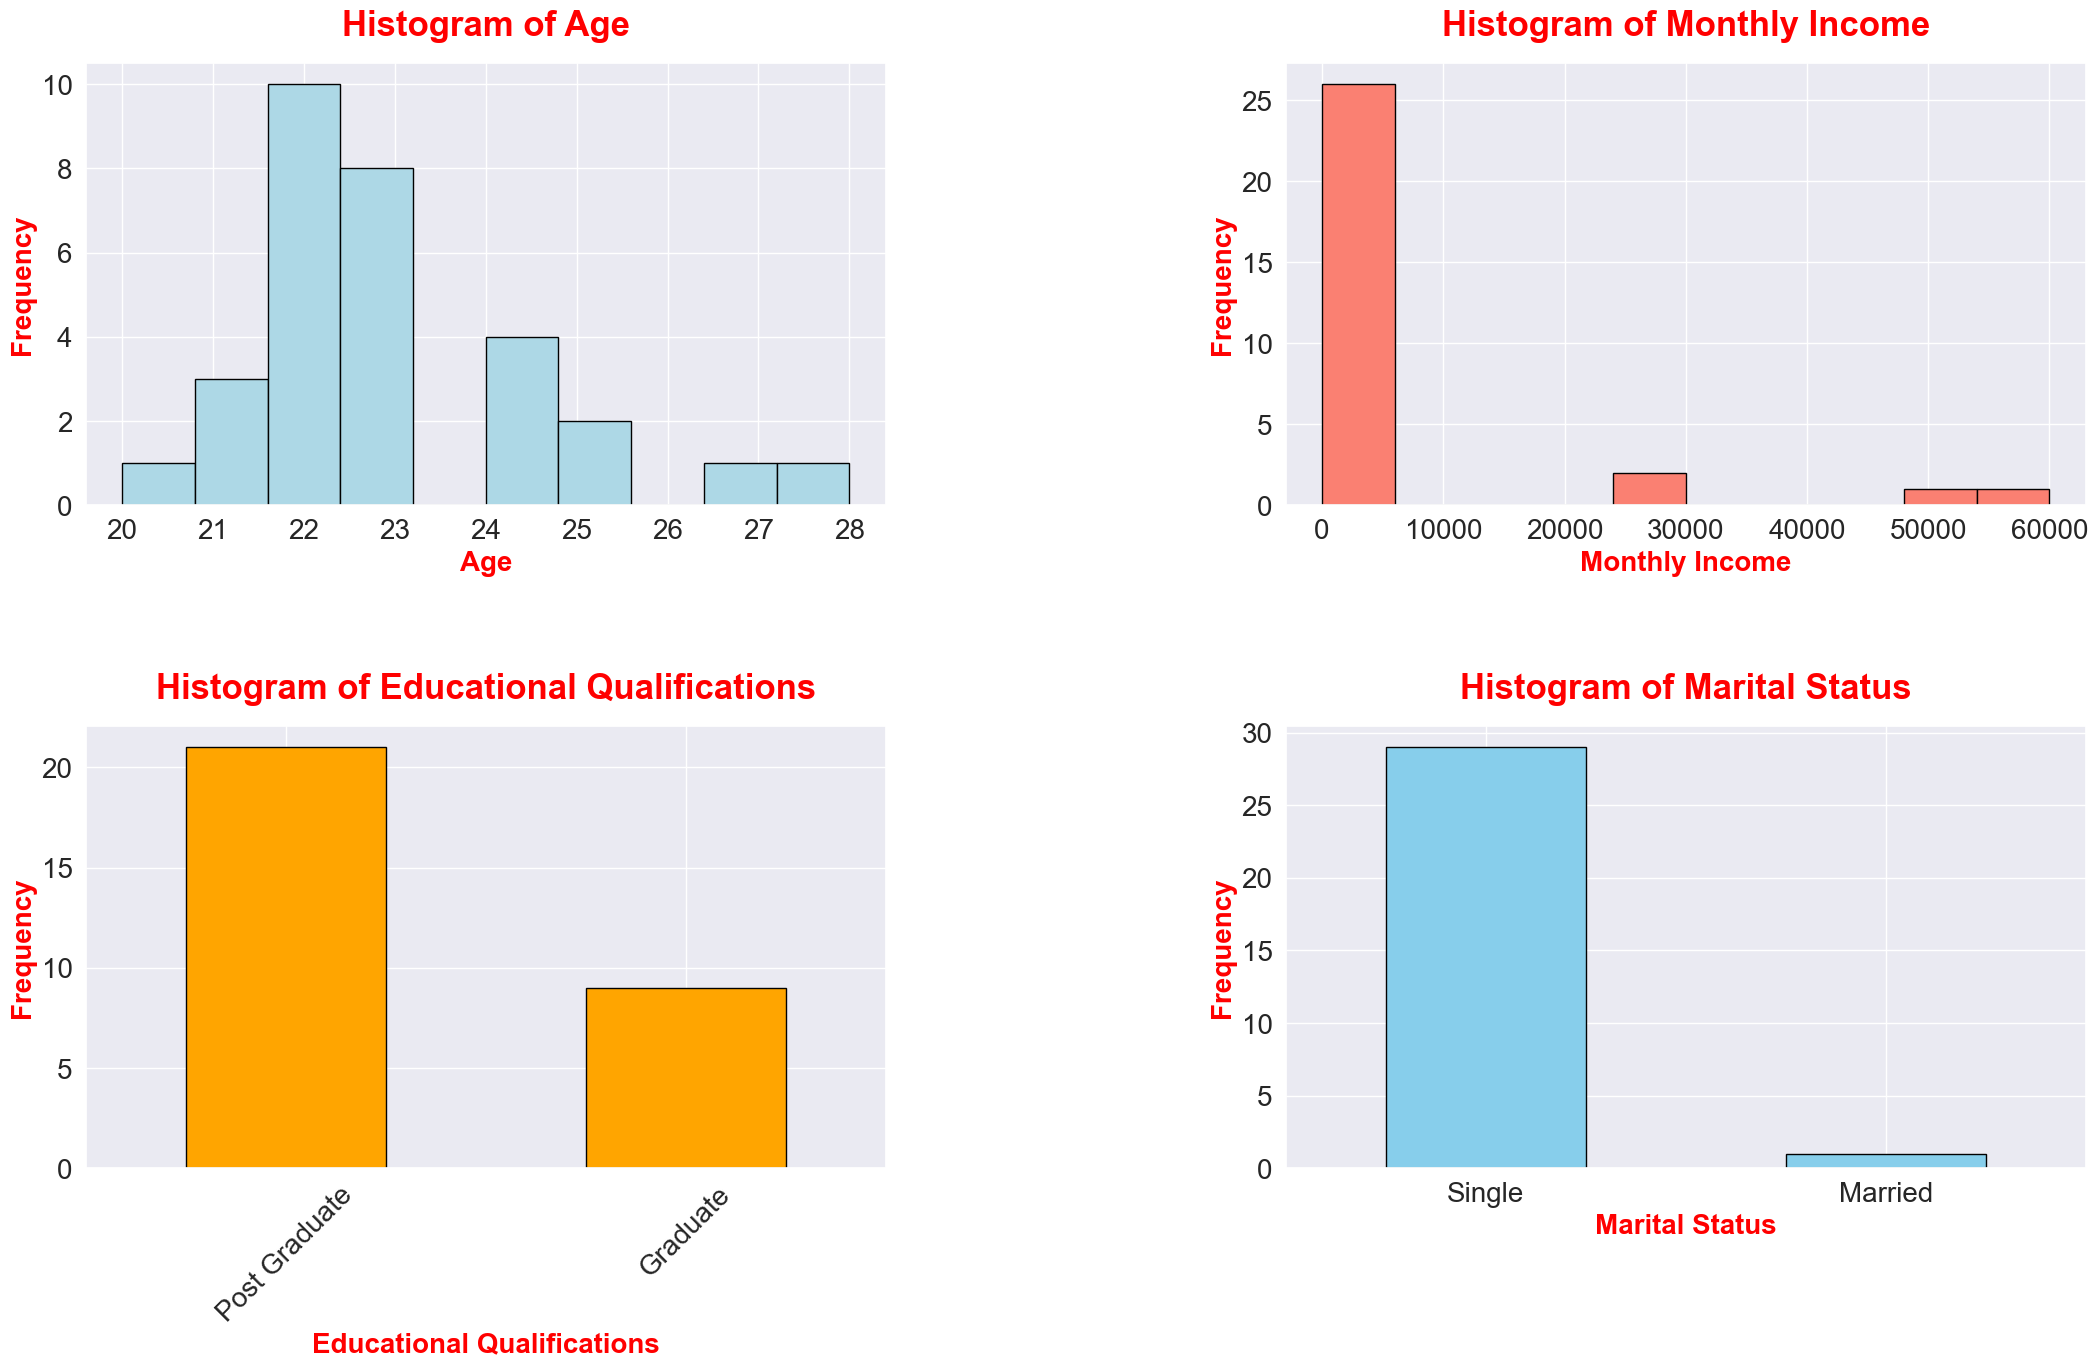

<Figure size 640x480 with 0 Axes>

In [604]:
#creating subplots
fig,axs=plt.subplots(2,2 ,figsize=(25,17))

#plotting the histogram by Age
# plot histogram
axs[0, 0].hist(appli2["Age"],bins=10,color='lightblue',edgecolor='black')

#Set title
axs[0, 0].set_title('Histogram of Age',pad=20,color="red",fontsize=25,fontweight="bold")

#Set X and Y axis labels
axs[0, 0].set_xlabel('Age',fontsize=20,fontweight="bold",color="red")
axs[0, 0].set_ylabel('Frequency',fontsize=20,fontweight="bold",color="red")

#Set X and y axis tick Params
axs[0, 0].tick_params(axis='x', labelsize=20)
axs[0, 0].tick_params(axis='y', labelsize=20)

#plot grid
axs[0, 0].grid(True)

# Plotting the histogram for Monthly Income
axs[0, 1].hist(appli2['Monthly Income'], bins=10, color='salmon', edgecolor='black')

#Set title for second graph
axs[0, 1].set_title('Histogram of Monthly Income',pad=20,color="red",fontsize=25,fontweight="bold")

#Set x and y axis labels for second subplot
axs[0, 1].set_xlabel('Monthly Income',fontsize=20,fontweight="bold",color="red")
axs[0, 1].set_ylabel('Frequency',fontsize=20,fontweight="bold",color="red")

#Set tick params for X and y axis and set fontsize.
axs[0, 1].tick_params(axis='x', labelsize=20)
axs[0, 1].tick_params(axis='y', labelsize=20)

#plot grid
axs[0, 1].grid(True)


# Plotting the histogram for Educational Qualifications
appli2['Educational Qualifications'].value_counts().plot(kind='bar', ax=axs[1, 0], color='orange', edgecolor='black')

#set title for the Third subplot
axs[1, 0].set_title('Histogram of Educational Qualifications',pad=20,color="red",fontsize=25,fontweight="bold")

#Set X and Y axis labels and its font size and boldness.
axs[1, 0].set_xlabel('Educational Qualifications',fontsize=20,fontweight="bold",color="red")
axs[1, 0].set_ylabel('Frequency',fontsize=20,fontweight="bold",color="red")

#set Tick params for x and y axis.
axs[1, 0].tick_params(axis='x', rotation=45,labelsize=20)
axs[1, 0].tick_params(axis='y', labelsize=20)

#plot grid.
axs[1, 0].grid(True)

# Plotting the histogram for Marital Status
appli2['Marital Status'].value_counts().plot(kind='bar', ax=axs[1, 1], color='skyblue', edgecolor='black')

#Set fourth subplot title.
axs[1, 1].set_title('Histogram of Marital Status',pad=20,color="red",fontsize=25,fontweight="bold")

#Set X and Y axis label 
axs[1, 1].set_xlabel('Marital Status',fontsize=20,fontweight="bold",color="red")
axs[1, 1].set_ylabel('Frequency',fontsize=20,fontweight="bold",color="red")

#Set tick params for both axis
axs[1, 1].tick_params(axis='x', rotation=0,labelsize=20)
axs[1, 1].tick_params(axis='y', labelsize=20)

#plot grid
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Adjust layout to increase spacing between titles and x-axis labels
plt.subplots_adjust(top=0.85, bottom=0.2, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

#show the plot
plt.show()

plt.savefig("histogram.png")

# Scatter plot:

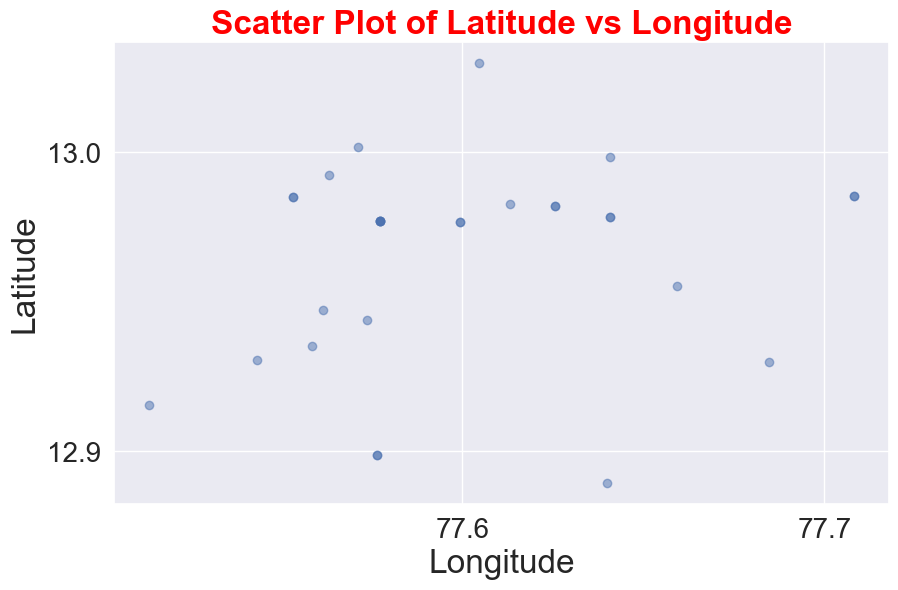

In [612]:
#To create a figure with specified size
plt.figure(figsize=(10, 6))

#To create scatter plot
plt.scatter(appli2['longitude'], appli2['latitude'], alpha=0.5)

#To Set title
plt.title('Scatter Plot of Latitude vs Longitude',fontsize=24,color="red",fontweight="bold")

#To set X and Y Axis labels and fontsize
plt.xlabel('Longitude',fontsize=24)
plt.ylabel('Latitude',fontsize=24)

#To plot Tick of both axis
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plot grid
plt.grid(True)

#Show plot
plt.show()


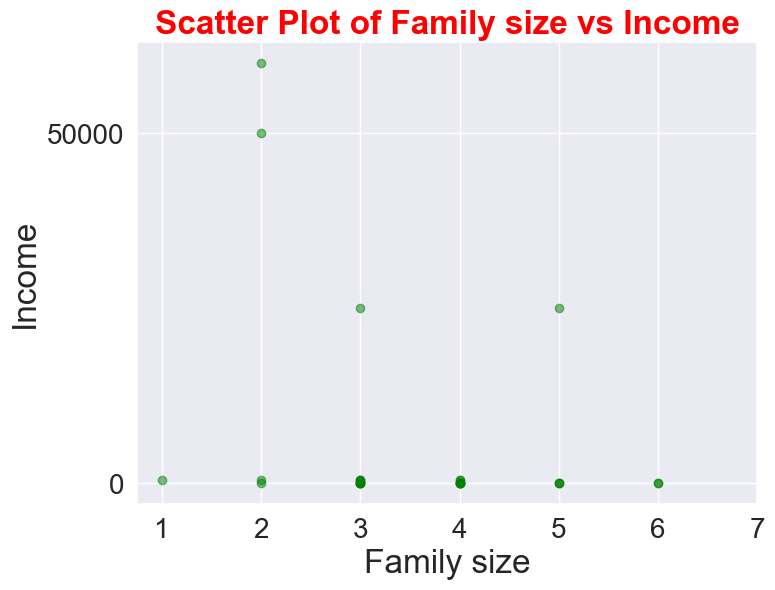

In [613]:
#To create a figure with specified size
plt.figure(figsize=(8, 6))

#To create scatter plot.
plt.scatter(appli2['Family size'], appli2['Monthly Income'], color='green', alpha=0.5)

#To plot Title.
plt.title('Scatter Plot of Family size vs Income',fontsize=24,color="red",fontweight="bold")

#To plot X and Y axis labels. 
plt.xlabel('Family size',fontsize=24)
plt.ylabel('Income',fontsize=24)

#To plot x and y axis ticks
plt.xticks([1,2,3,4,5,6,7,],fontsize=20)
plt.yticks(fontsize=20)

#plot grid
plt.grid(True)

#show plot.
plt.show()

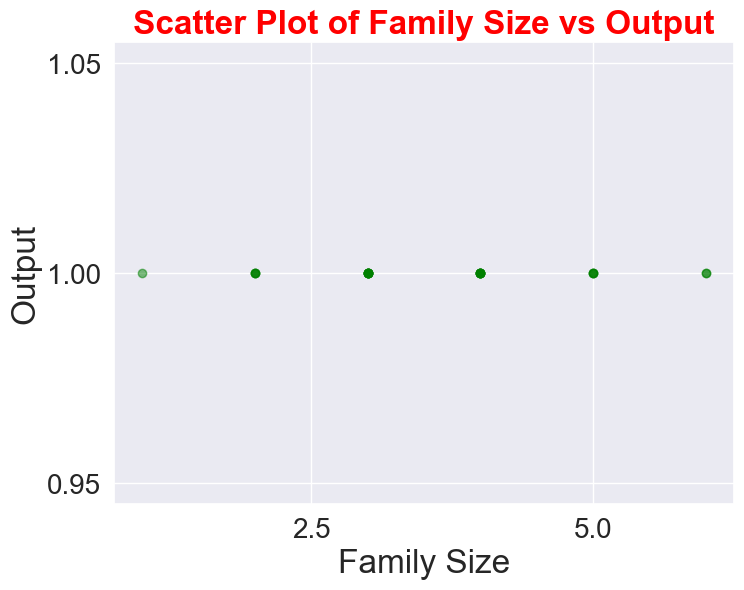

In [614]:
#To create a figure with specified size
plt.figure(figsize=(8, 6))

#To plot scatter graph
plt.scatter(appli2['Family size'], appli2['Output'], color='green', alpha=0.5)

#To plot Title
plt.title('Scatter Plot of Family Size vs Output',color="red",fontsize=24,fontweight="bold")

#To plot x and y axis labels
plt.xlabel('Family Size',fontsize=24)
plt.ylabel('Output',fontsize=24)

#To plot X and y axis ticks size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#To plot grid
plt.grid(True)

#show plot
plt.show()

# Heat map:

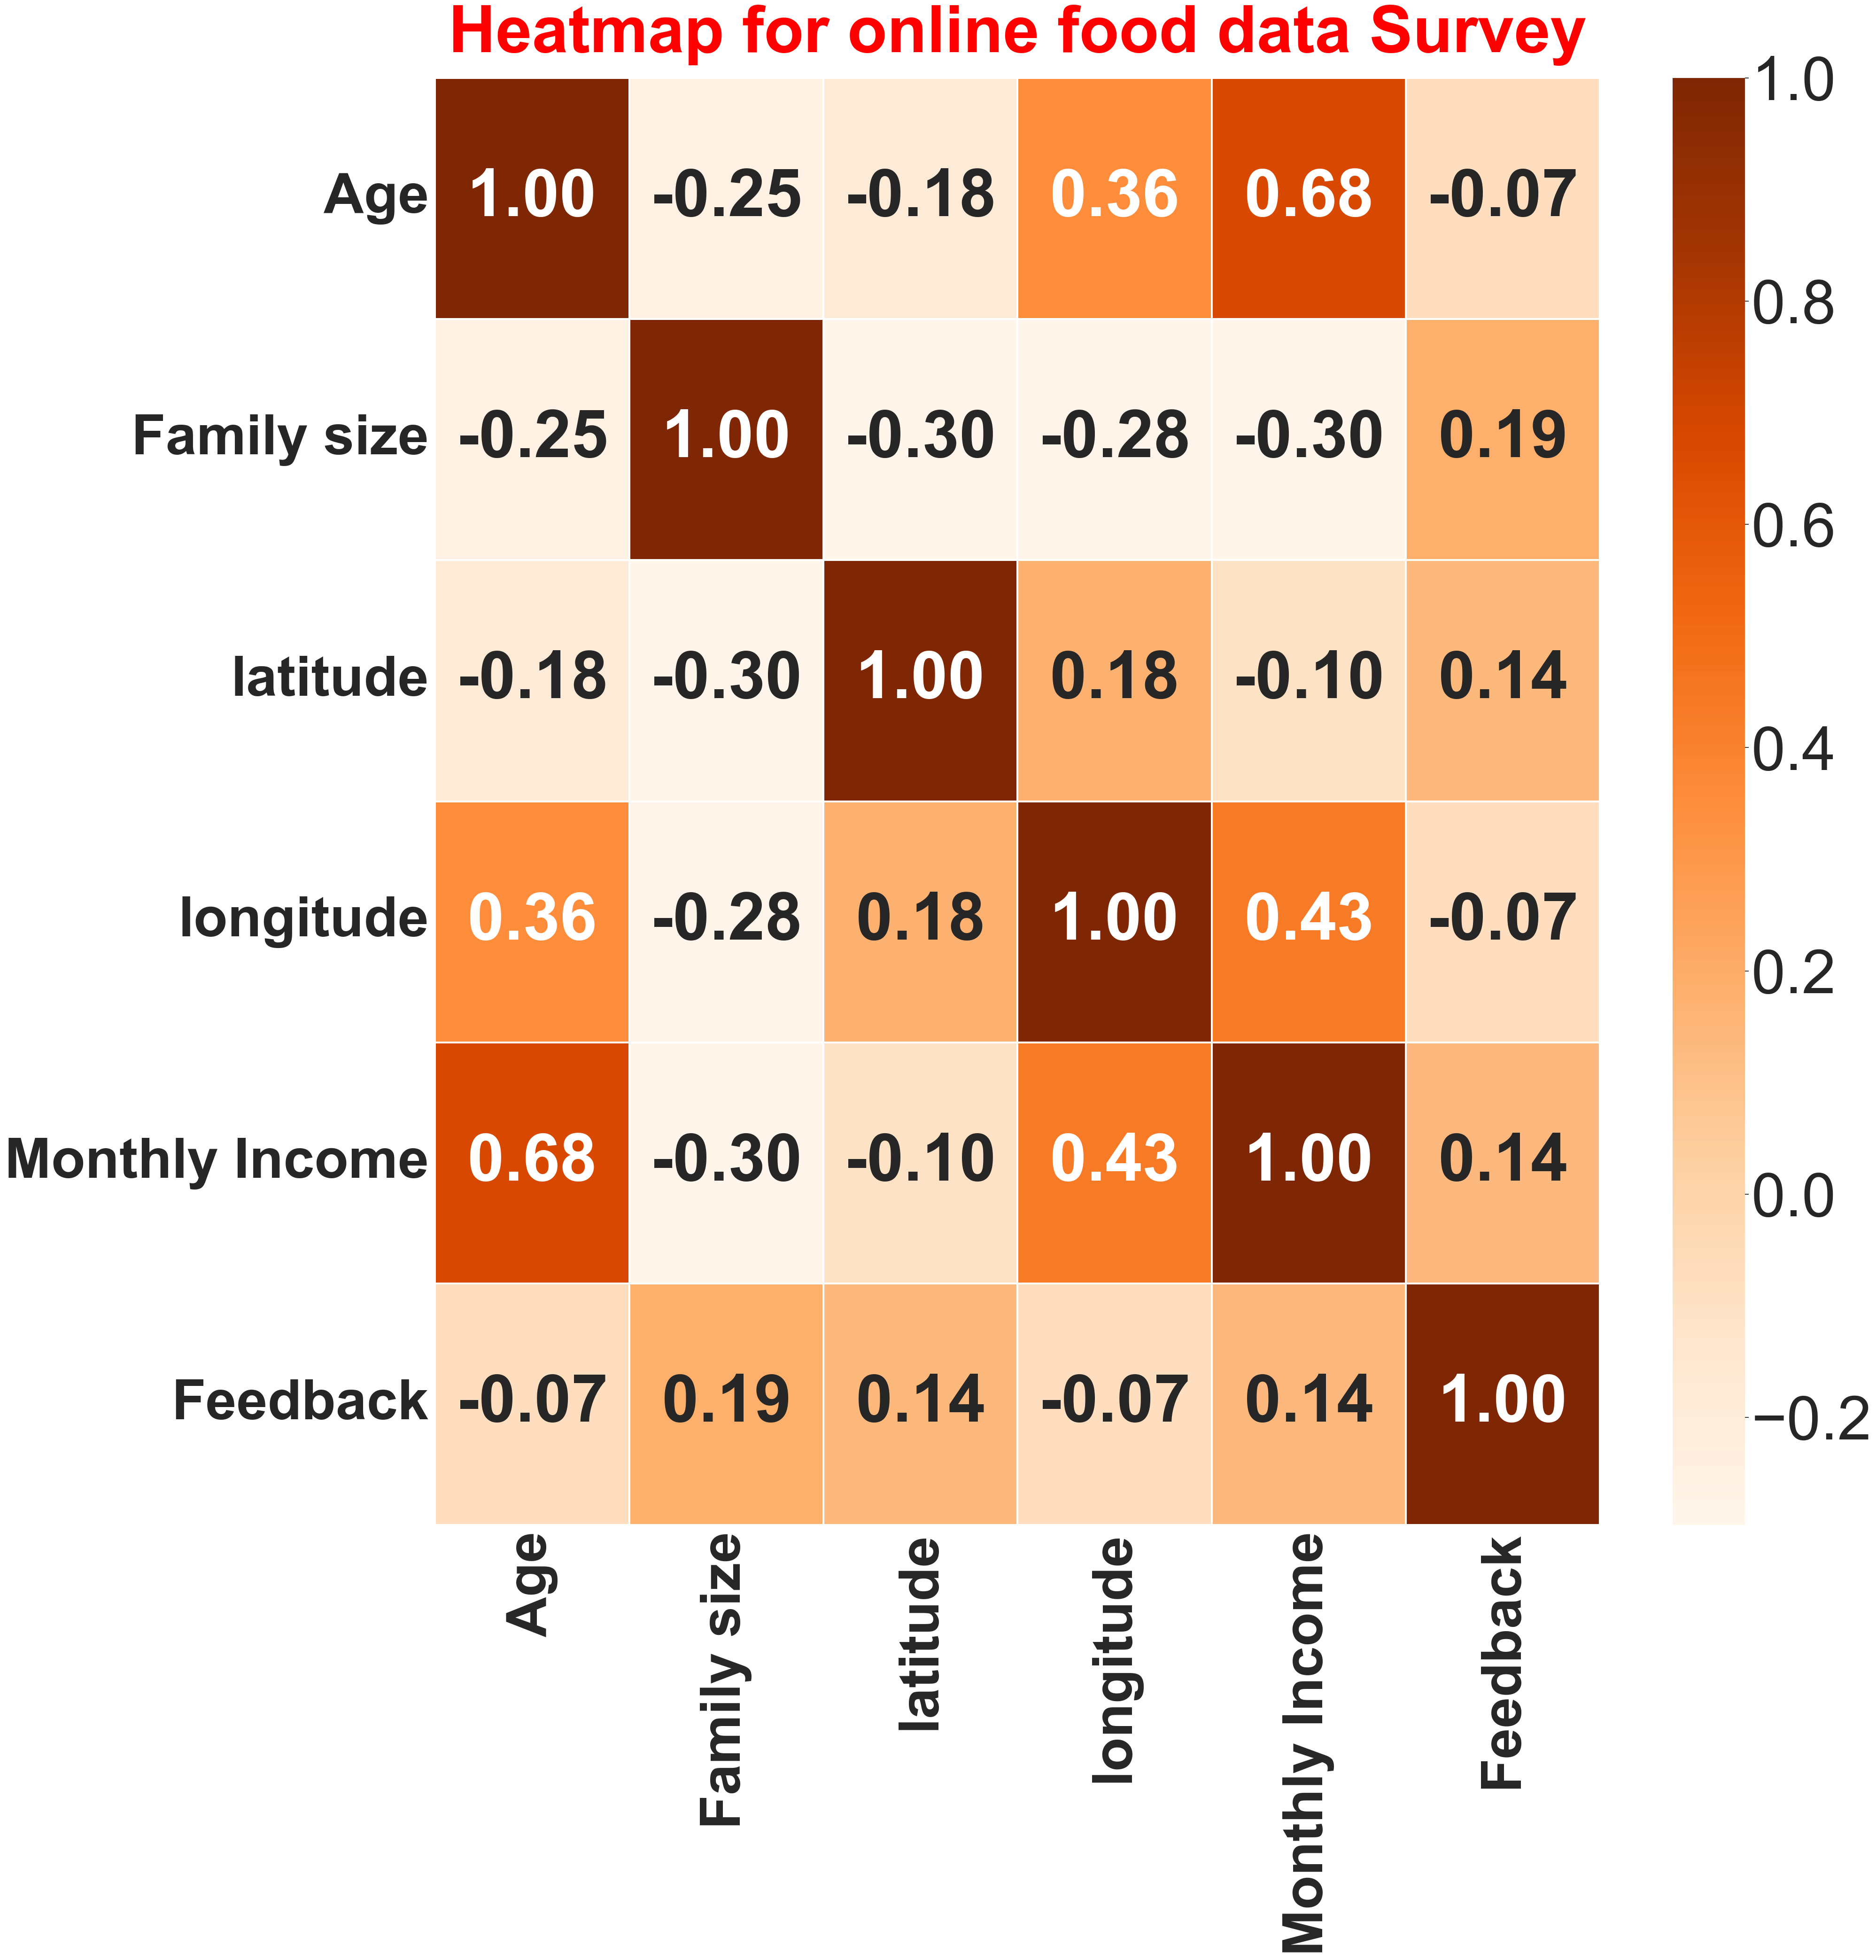

In [505]:
#heat map
comparison=['Age','Family size','latitude', 'longitude', 'Monthly Income',"Feedback"]
corelation=appli2[comparison].corr()

#To create a figure with specified size
plt.figure(figsize=(40,40))

#Code for heat map
sns.heatmap(corelation,annot=True,cmap='Oranges',fmt=".2f",linewidths=2.8,annot_kws={"weight":"bold"})
sns.set(font_scale=8.5)

#plot x and y axis tick values size and boldness
plt.xticks(fontweight="bold",fontsize=85.5)
plt.yticks(fontweight="bold",fontsize=85.5)

#plot the title
plt.title('Heatmap for online food data Survey',fontsize=100.0,fontweight="bold",color="red",pad= 40)

#Show the plot
plt.show()

# Elbow:

C:\Users\hemaponnus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hemaponnus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hemaponnus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hemaponnus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a m

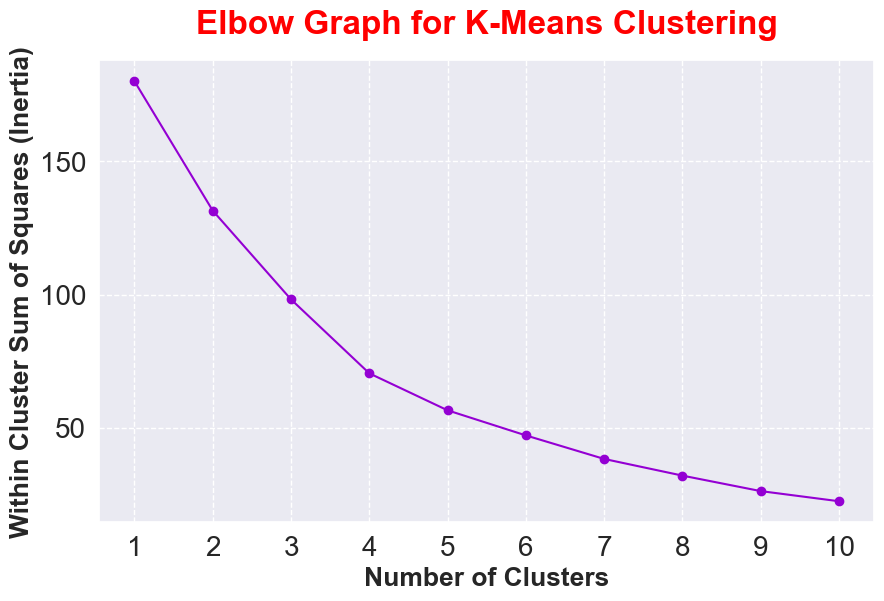

In [616]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#--------------------------------------------------------------------------------------------------------------------------------------

# Take the necessary data
appli3= appli2[['Age','Family size','latitude', 'longitude', 'Monthly Income',"Feedback"]]

# Initialize the StandardScaler
scaler= StandardScaler()

# Fit and transform the selected specifications 
scaled_appli3= scaler.fit_transform(appli3)

#Determining Optimal K:
k_values = range(1, 11)
inertia_values =[ ]

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(scaled_appli3)
    inertia_values.append(kmeans.inertia_)
    
#Plotting the Elbow Graph:graph:

#To create a figure with specified size
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values, marker='o', color='darkviolet', linestyle='-')

#Plot title for the graph
plt.title("Elbow Graph for K-Means Clustering", fontsize=24, fontweight='bold', pad=19,color="red")

#setting x and Y axis labels,fontsize and fontweight
plt.xlabel("Number of Clusters", fontsize=19, fontweight='bold')
plt.ylabel("Within Cluster Sum of Squares (Inertia)", fontsize=19, fontweight='bold')

#plotting ticks in X and y axis 
plt.xticks(k_values,fontsize=20)
plt.yticks(fontsize=20)

#plot the grid
plt.grid(linestyle='dashed')

#show the plot
plt.show()

# Clustering :

C:\Users\hemaponnus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


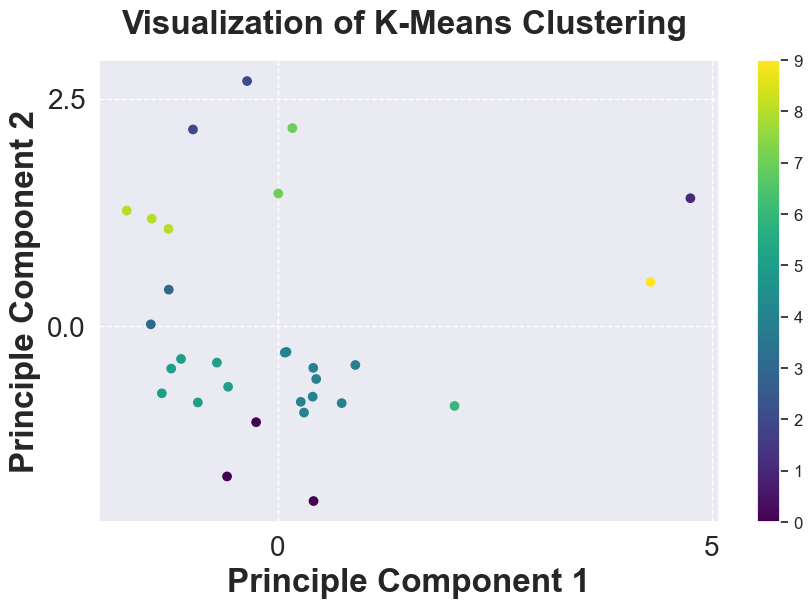

In [618]:
appli3= appli2[['Age','Family size','latitude', 'longitude', 'Monthly Income',"Feedback"]]

# Initialize the StandardScaler
scaler= StandardScaler()

# Fit and transform the selected specifications 
scaled_appli3= scaler.fit_transform(appli3)

pca= PCA(n_components=2)
p_components= pca.fit_transform(scaled_appli3)

K=3

kmeans= KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(p_components) 
cluster_labels= kmeans.labels_

#To create a figure with specified size
plt.figure(figsize=(10,6))
#plot scatterplt
plt.scatter(p_components[:,0], p_components[:,1], c=cluster_labels, cmap='viridis')
#plot title
plt.title('Visualization of K-Means Clustering ', fontsize=24, fontweight='bold',pad=19)
#plot x and y axis labels.
plt.xlabel("Principle Component 1", fontsize=24, fontweight='bold')
plt.ylabel("Principle Component 2", fontsize=24, fontweight='bold')
#plot x and y axis ticks 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plot grid 
plt.grid(linestyle='dashed')
color_bar=plt.colorbar()
color_bar.ax.tick_params(labelsize=12)
#plot show
plt.show()

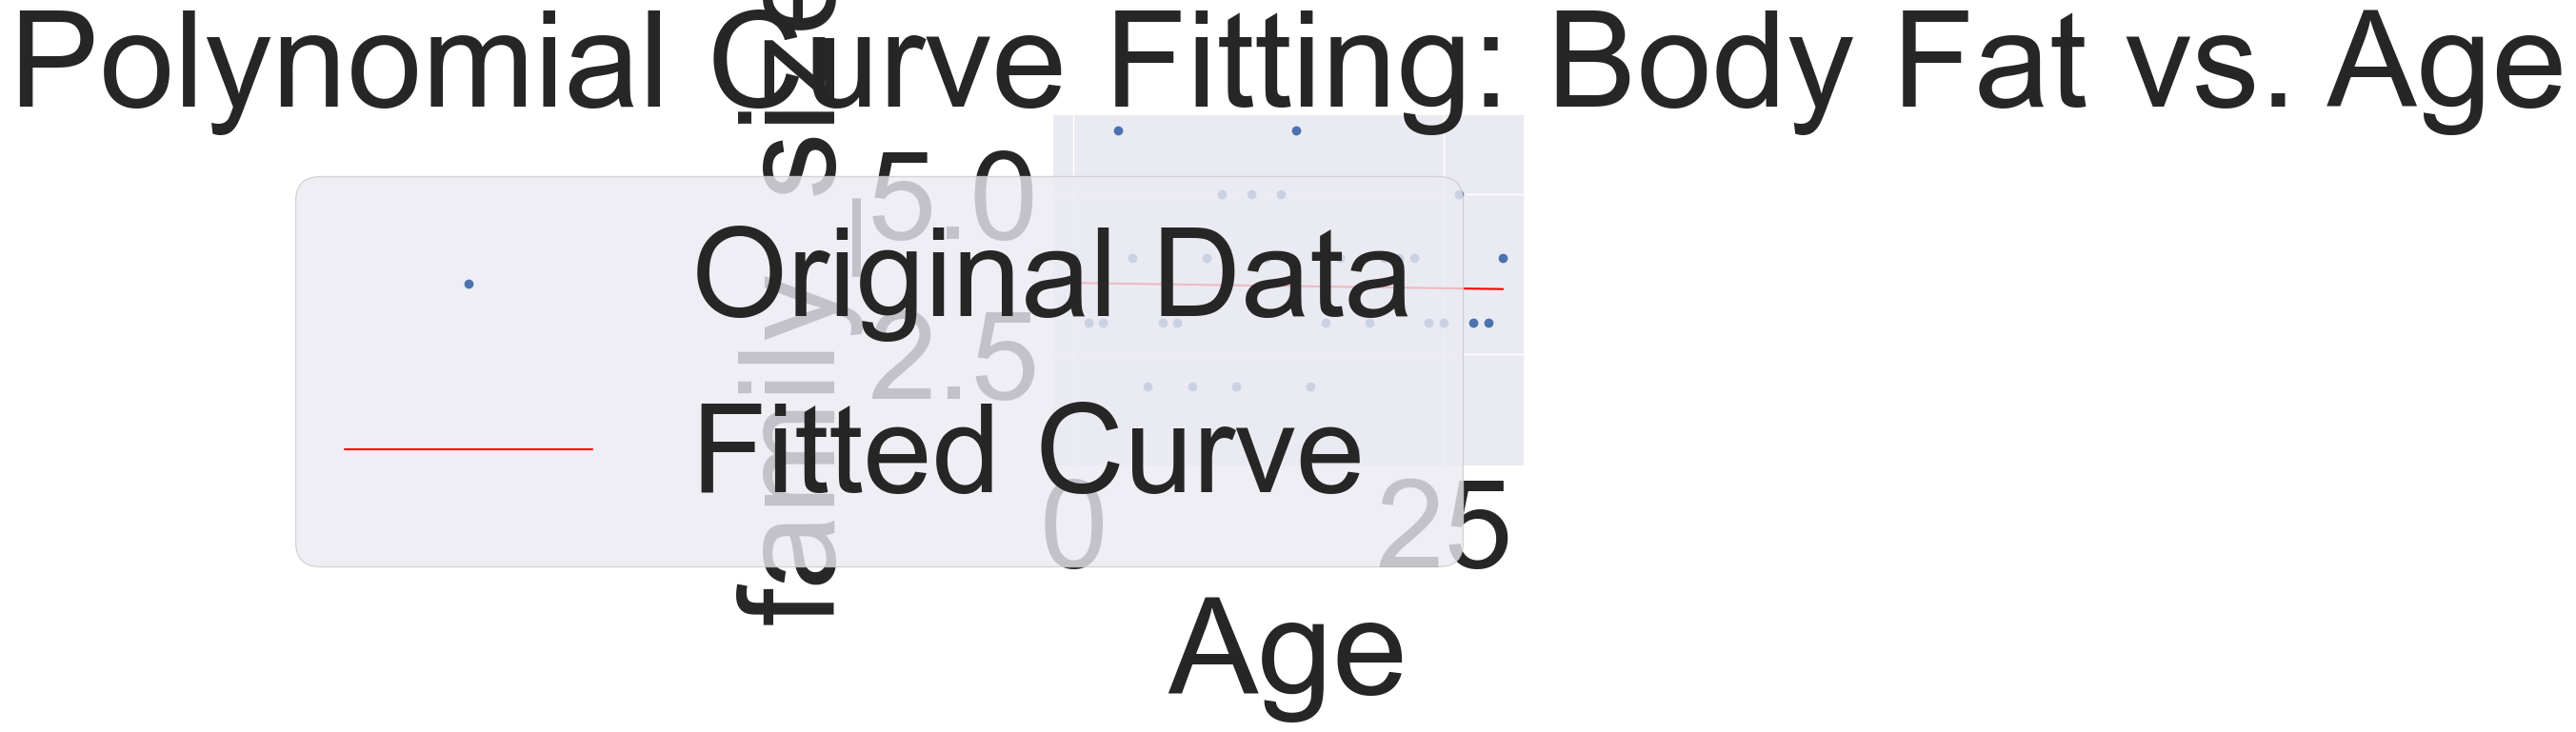

Optimized Parameters:
a = 4.965832874015419e-06
b = -0.0034810503756272926
c = 3.6157258064573714


In [620]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming your data is in DataFrame format
# Extracting data from DataFrame
age = appli2.index.values  # Assuming age is the index
family_size = appli2['Family size'].values

# Define the polynomial function you want to fit
def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c

# Concatenate all data
x_data = age  # X data will be age
y_data = family_size  # Y data will be body fat

# Perform curve fitting
popt, pcov = curve_fit(polynomial_function, x_data, y_data)

# Extract optimized parameters
a_opt, b_opt, c_opt = popt

# Plot original data and fitted curve
plt.scatter(x_data, y_data, label='Original Data',)
plt.plot(x_data, polynomial_function(x_data, a_opt, b_opt, c_opt), label='Fitted Curve', color='red')
plt.xlabel('Age',font)
plt.ylabel('family_size')
plt.title('Polynomial Curve Fitting: Body Fat vs. Age')
plt.legend()
plt.grid(True)
plt.show()

# Print optimized parameters
print("Optimized Parameters:")
print("a =", a_opt)
print("b =", b_opt)
print("c =", c_opt)